In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [116]:
dataset = pd.read_csv('Mall_customers.csv')

In [117]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [118]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [119]:
dataset.drop(['CustomerID'], axis = 1, inplace = True)


In [120]:
dataset.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [121]:
dataset.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [122]:
dataset = dataset.rename(columns = {'Annual Income (k$)': 'Income', 'Spending Score (1-100)': "Spending"})

In [123]:
dataset.columns

Index(['Gender', 'Age', 'Income', 'Spending'], dtype='object')

# Univariate Analysis

## Hist and Kde plot

<Axes: xlabel='Income', ylabel='Density'>

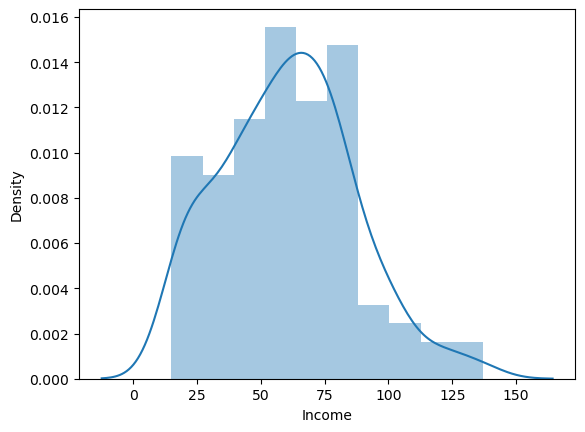

In [124]:
sns.distplot(dataset["Income"])

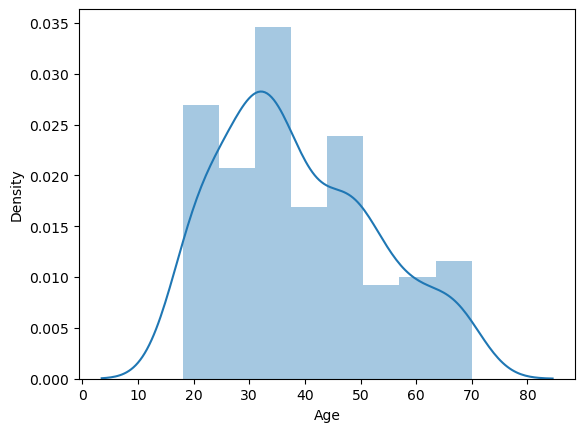

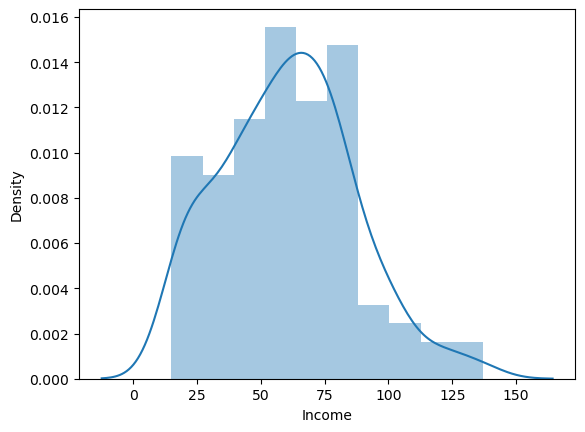

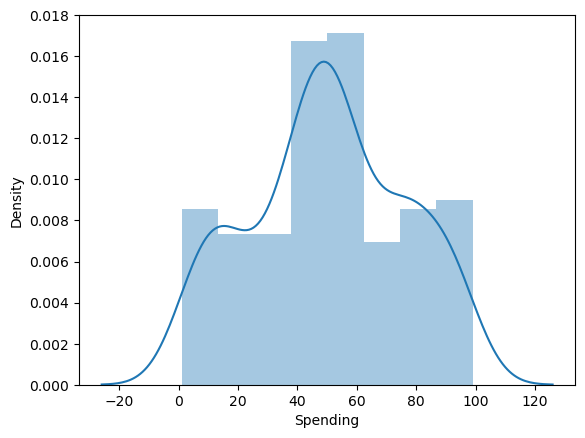

In [125]:
for feature in ['Age', 'Income', 'Spending']:
    plt.figure()
    sns.distplot(dataset[feature])

## Kde plot

In [126]:
# sns.kdeplot(data = dataset, x = 'Income', hue = 'Gender', shade = True)


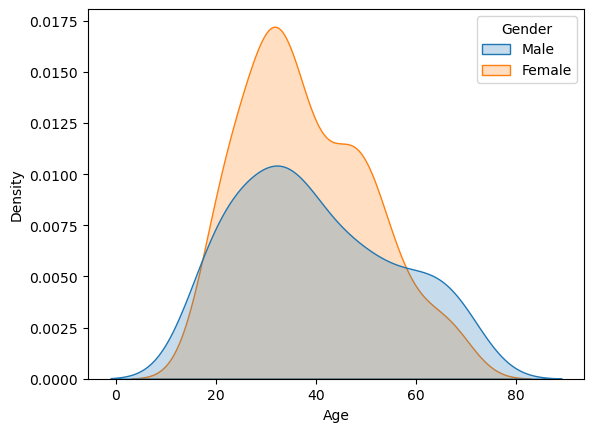

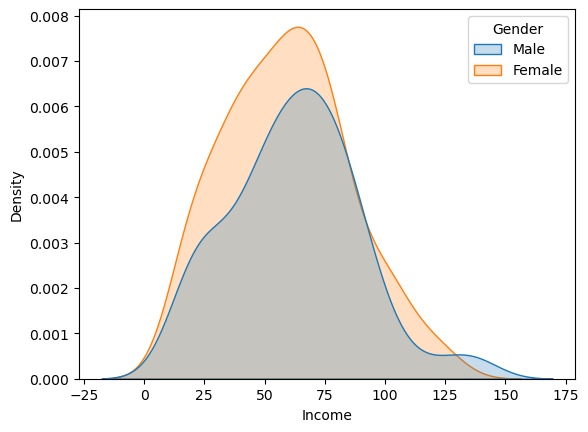

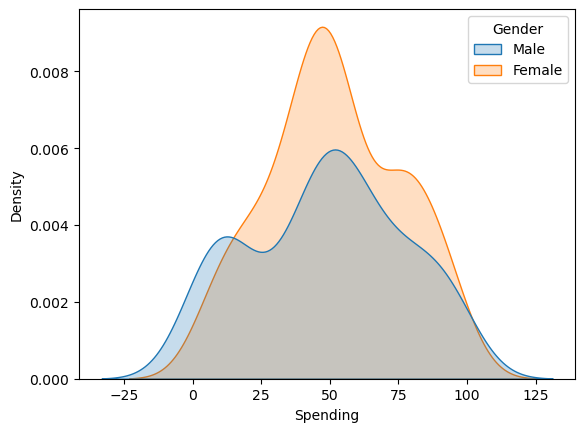

In [127]:
for feature in ['Age', 'Income', 'Spending']:
    plt.figure()
    sns.kdeplot(data = dataset, x = feature, hue = 'Gender', shade = True)

## Boxplot

In [128]:
# sns.boxplot(data = dataset, x = "Gender", y = dataset['Income'])

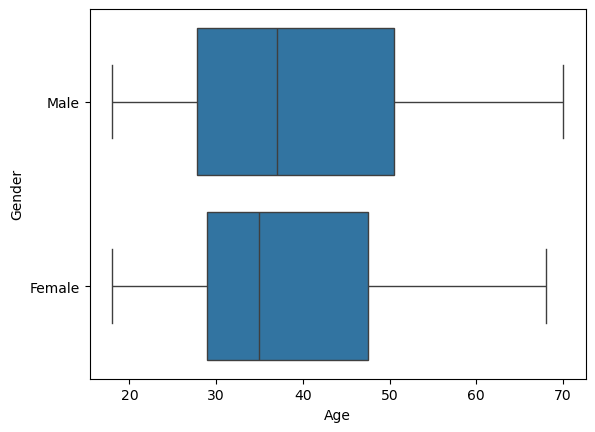

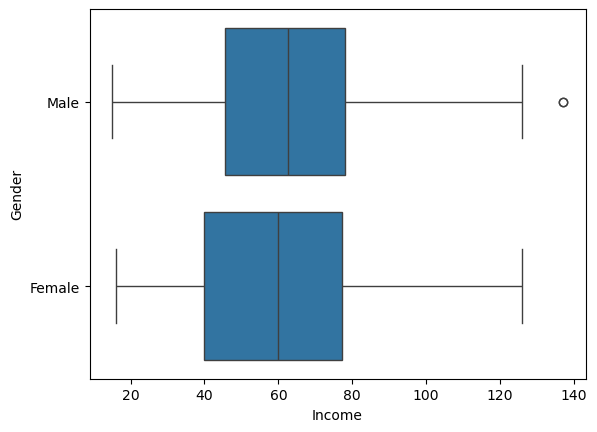

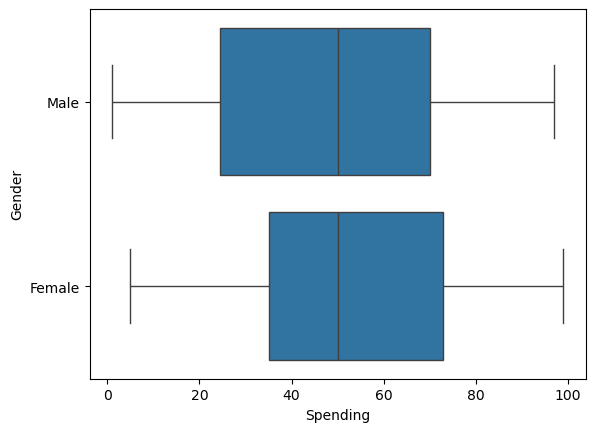

In [129]:
for feature in ['Age', 'Income', 'Spending']:
    plt.figure()
    sns.boxplot(data = dataset, x = feature, y = 'Gender')

## Bivariate Analysis

<Axes: xlabel='Income', ylabel='Spending'>

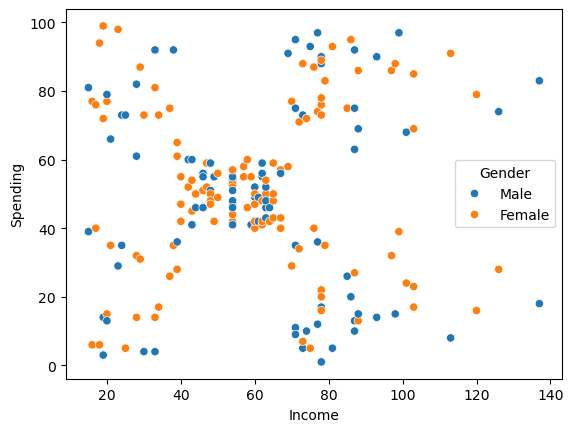

In [130]:
sns.scatterplot(data = dataset, x = 'Income', y = 'Spending', hue = 'Gender', palette = 'tab10')

<Figure size 1200x1200 with 0 Axes>

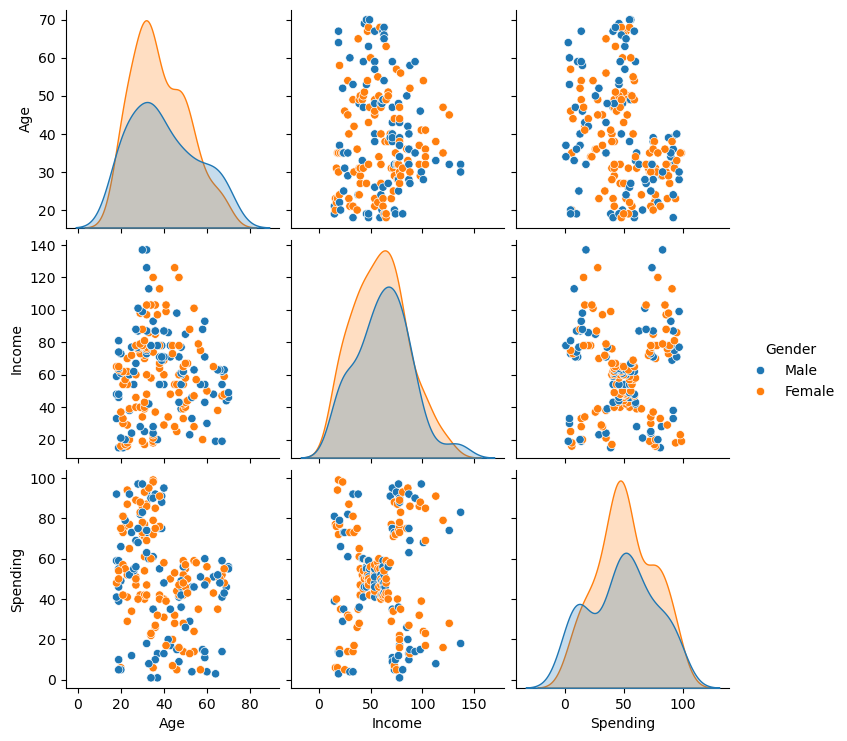

In [131]:
plt.figure(figsize = (12,12))
sns.pairplot(data = dataset, palette = 'tab10', hue = "Gender");

In [132]:
# convert Gender column
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()


In [133]:
dataset['Gender'] = pd.get_dummies(dataset[['Gender']], drop_first = True)
dataset

,Gender,Age,Income,Spending
0,True,19,15,39
1,True,21,15,81
2,False,20,16,6
3,False,23,16,77
4,False,31,17,40
...,...,...,...,...
195,False,35,120,79
196,False,45,126,28
197,True,32,126,74
198,True,32,137,18


In [134]:
dataset['Gender'] = encoder.fit_transform(dataset['Gender'])


In [135]:
dataset

,Gender,Age,Income,Spending
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


Text(0.5, 1.0, 'Heatmap of Correlations')

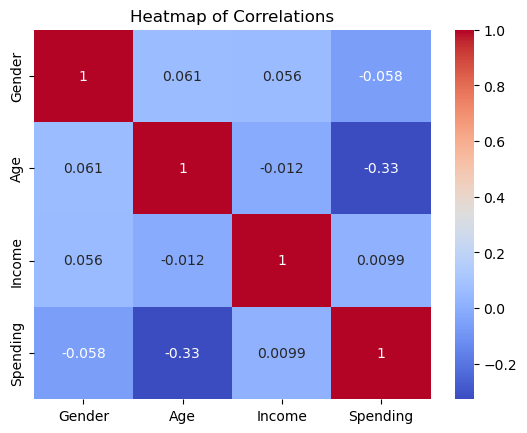

In [136]:
# heatmap of Correlations 
sns.heatmap(dataset.corr(), annot = True, cmap = 'coolwarm')
plt.title('Heatmap of Correlations')

# Cluster-Univariate

In [137]:
# use KMeans for feature 'Income'
from sklearn.cluster import KMeans
inertia_scores = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(dataset[['Income']])
    inertia_scores.append(kmeans.inertia_)
inertia_scores

[137277.28000000006,
 48660.888888888876,
 23528.15217391306,
 13278.112713472483,
 8481.49619047619,
 5050.9047619047615,
 3950.2126984127017,
 2862.8330280830296,
 2362.198443223445,
 1746.4707792207803]

Text(0.5, 0, 'Inertua')

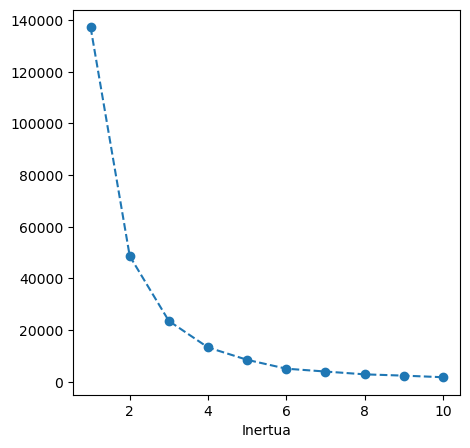

In [138]:
# Draw plot of inertia
plt.figure(figsize = (5, 5))
plt.plot(range(1,11), inertia_scores, marker = 'o', linestyle = '--')
plt.xlabel('Inertua')


In [139]:
# choose n_cluster = 3
clustering1 = KMeans(n_clusters = 3)
clustering1.fit(dataset[['Income']])
dataset['Income cluster'] = clustering1.labels_


In [140]:
dataset['Income cluster'].value_counts()

Income cluster
0    90
1    74
2    36
Name: count, dtype: int64

## Bivariate Cluster

In [141]:
# choose 2 feature Income, and Spending

inertia_scores = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(dataset[['Income', 'Spending']])
    inertia_scores.append(kmeans.inertia_)
inertia_scores

[269981.28,
 183257.86154461786,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37233.814510710006,
 30227.606513152008,
 25018.57633477634,
 21797.08494464637,
 19636.753964898147]

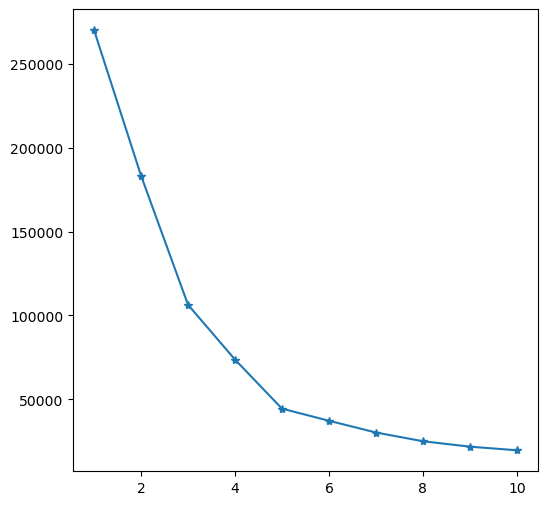

In [142]:
plt.figure(figsize = (6,6))
plt.plot(range(1, 11), inertia_scores, marker = '*', linestyle = '-');

In [143]:
# choose n_cluster = 5
clustering2 = KMeans(n_clusters = 5)
clustering2.fit(dataset[['Income', 'Spending']])
dataset['Income & Spending'] = clustering2.labels_
dataset.head()

,Gender,Age,Income,Spending,Income cluster,Income & Spending
0,1,19,15,39,1,4
1,1,21,15,81,1,3
2,0,20,16,6,1,4
3,0,23,16,77,1,3
4,0,31,17,40,1,4


In [144]:
dataset['Income & Spending'].value_counts()

Income & Spending
0    81
2    39
1    35
4    23
3    22
Name: count, dtype: int64

In [145]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers

,0,1
0,55.296296,49.518519
1,88.200000,17.114286
2,86.538462,82.128205
3,25.727273,79.363636
4,26.304348,20.913043


In [146]:
centers.columns = ['x', 'y']

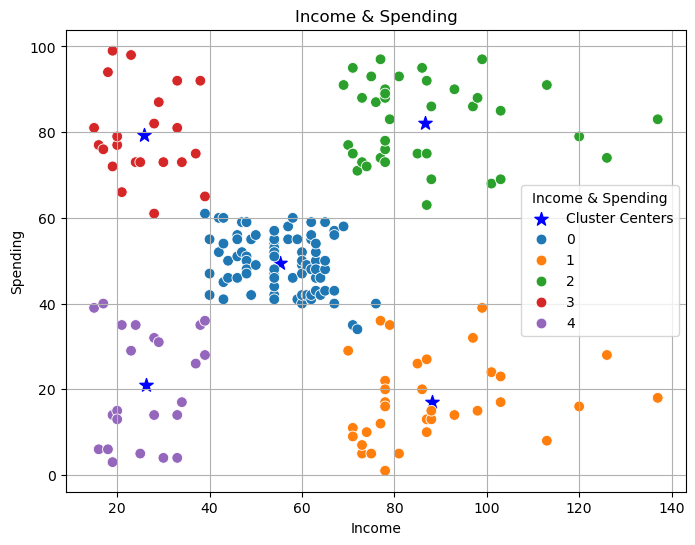

In [148]:
plt.figure(figsize = (8,6))
plt.scatter(data = centers, x = 'x', y = 'y', color = 'Blue', label = 'Cluster Centers', s = 100, marker = '*');
sns.scatterplot(data = dataset, x = 'Income', y = 'Spending', hue = 'Income & Spending', s = 60, palette = 'tab10');
plt.title('Income & Spending')
plt.grid(True)

## Multivariate cluster

In [150]:
dataset.columns

Index(['Gender', 'Age', 'Income', 'Spending', 'Income cluster',
       'Income & Spending'],
      dtype='object')

In [152]:
inertia_scores = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(dataset[['Gender', 'Age', 'Income', 'Spending']])
    inertia_scores.append(kmeans.inertia_)
inertia_scores 

[308862.06000000006,
 212889.44245524303,
 143391.59236035676,
 104422.83498539751,
 75399.61541401484,
 58348.641363315044,
 51169.25976088793,
 44391.82080487078,
 40663.67315640882,
 37606.469600372264]

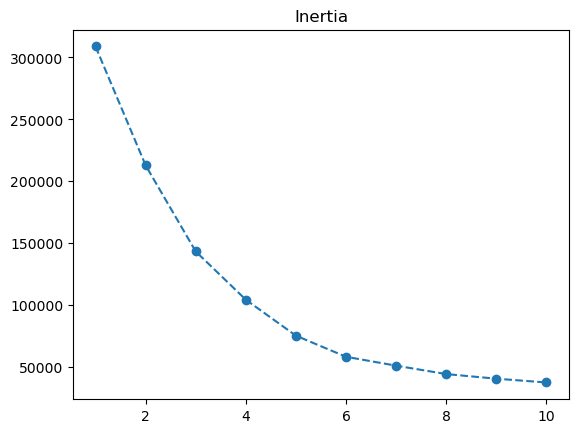

In [155]:
plt.figure()
plt.plot(range(1,11), inertia_scores, marker = 'o', linestyle = '--')
plt.title("Inertia");

In [158]:
clustering3 = KMeans(n_clusters = 5)
clustering3.fit(dataset[['Gender', 'Age', 'Income', 'Spending']])
dataset['Multivariate cluster'] = clustering3.labels_

In [159]:
dataset['Multivariate cluster'].value_counts()

Multivariate cluster
0    77
1    39
4    36
2    25
3    23
Name: count, dtype: int64

In [166]:
# from sklearn.decomposition import PCA
# import pandas as pd

# # Reduce the data to 2 dimensions using PCA
# pca = PCA(n_components=2)
# pca_components = pca.fit_transform(dataset[['Gender', 'Age', 'Income', 'Spending']])

# # Create a DataFrame with the PCA components and cluster labels
# pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])
# pca_df['Cluster'] = dataset['Multivariate cluster']

# # Plot the clusters in the 2D PCA space
# plt.figure(figsize=(8, 6))
# sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='tab10', s=60)
# plt.title('Clusters Visualized in 2D PCA Space')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.grid(True)
# plt.show()


In [165]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Assuming 'dataset' contains 'Gender', 'Age', 'Income', 'Spending', and 'Multivariate cluster'
# sns.pairplot(dataset, hue='Multivariate cluster', vars=['Gender', 'Age', 'Income', 'Spending'], palette='tab10')
# plt.show()


In [164]:
from mpl_toolkits.mplot3d import Axes3D

# Reduce the data to 3 dimensions using PCA
# pca_3d = PCA(n_components=3)
# pca_components_3d = pca_3d.fit_transform(dataset[['Gender', 'Age', 'Income', 'Spending']])

# # Create a DataFrame for easier plotting
# pca_df_3d = pd.DataFrame(pca_components_3d, columns=['PC1', 'PC2', 'PC3'])
# pca_df_3d['Cluster'] = dataset['Multivariate cluster']

# # Create a 3D scatter plot
# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111, projection='3d')
# scatter = ax.scatter(pca_df_3d['PC1'], pca_df_3d['PC2'], pca_df_3d['PC3'], c=pca_df_3d['Cluster'], cmap='tab10', s=60)
# ax.set_title('3D PCA Clusters')
# ax.set_xlabel('PC1')
# ax.set_ylabel('PC2')
# ax.set_zlabel('PC3')
# plt.colorbar(scatter, label='Cluster')
# plt.show()


## evaluate each clustering

In [163]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score for each clustering
silhouette_income = silhouette_score(dataset[['Income']], dataset['Income cluster'])
silhouette_income_spending = silhouette_score(dataset[['Income', 'Spending']], dataset['Income & Spending'])
silhouette_multivariate = silhouette_score(dataset[['Gender', 'Age', 'Income', 'Spending']], dataset['Multivariate cluster'])

print(f"Silhouette Score for Income cluster: {silhouette_income}")
print(f"Silhouette Score for Income & Spending cluster: {silhouette_income_spending}")
print(f"Silhouette Score for Multivariate cluster: {silhouette_multivariate}")


Silhouette Score for Income cluster: 0.5630778156006976
Silhouette Score for Income & Spending cluster: 0.553931997444648
Silhouette Score for Multivariate cluster: 0.4402372958247734
